In [3]:
import audacity as au
import numpy as np
import scipy.io.wavfile as wf
import scipy.signal as sig
import matplotlib.pyplot as pl
%matplotlib inline

In [20]:
auf = au.Aup('characteristic_transitions/flute_characteristic2_061217.aup')

In [21]:
auf.get_annotation_data()

[{'end': 2.7, 'label': '', 'start': 2.2},
 {'end': 4.05, 'label': '', 'start': 3.55},
 {'end': 6.5, 'label': '', 'start': 6.0},
 {'end': 7.95, 'label': '', 'start': 7.45},
 {'end': 10.0, 'label': '', 'start': 9.5},
 {'end': 11.8, 'label': '', 'start': 11.3},
 {'end': 13.5, 'label': '', 'start': 13.0},
 {'end': 15.2, 'label': '', 'start': 14.7},
 {'end': 16.9, 'label': '', 'start': 16.4},
 {'end': 18.6, 'label': '', 'start': 18.1},
 {'end': 20.65, 'label': '', 'start': 20.15},
 {'end': 22.5, 'label': '', 'start': 21.75},
 {'end': 24.25, 'label': '', 'start': 23.75},
 {'end': 26.8, 'label': '', 'start': 25.65},
 {'end': 28.15, 'label': '', 'start': 27.65},
 {'end': 30.25, 'label': '', 'start': 29.5},
 {'end': 32.15, 'label': '', 'start': 31.4},
 {'end': 34.1, 'label': '', 'start': 33.35},
 {'end': 35.75, 'label': '', 'start': 35.25},
 {'end': 37.85, 'label': '', 'start': 37.1},
 {'end': 39.95, 'label': '', 'start': 39.2},
 {'end': 44.35, 'label': '', 'start': 43.6},
 {'end': 45.8, 'label

In [23]:
sr, w = wf.read('characteristic_transitions/Audio Track-3.wav')

C:\Users\acoustics\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [26]:
ww = w[int(2.2*sr):int(2.7*sr)]

In [ ]:
wfft = np.fft.fft(ww)
pl.plot(np.abs(wfft))

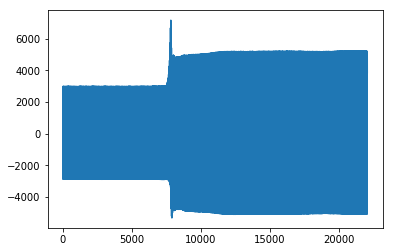

In [27]:
pl.figure()
pl.plot(ww)

pl.plot(sig.butter)

(7000, 8500)

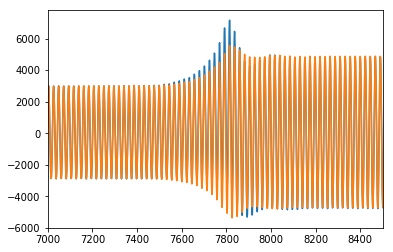

In [42]:
b, a = sig.butter(4, 1000/sr, 'high')
wf = sig.filtfilt(b,a,ww)
pl.figure()
pl.plot(ww)
pl.plot(wf)
pl.xlim([7000,8500])


In [37]:
1000/sr

0.022675736961451247

In [ ]:
def firstmax(sig):
    for i in range(25):
        q = sig[i+1]
        p = sig[i]
        if q < p:
            r = sig[i:]
            return r
            break

firstmax(w3)

In [ ]:
test = np.empty([0, 2], int)
test2 = (1000, 0)
test3 = (-257, 1)
k = np.vstack((test, test2))
np.vstack((k,test3))

In [ ]:
test4 = []
test5 = [1000, 'min']
test6 = [-257, 'max']
test4.append(test6)
test4.append(test5)
print(test4)
test4[0][1]

In [ ]:
ww = w3[565000:567000]
b, a = sig.butter(4, 1000/sr, 'high')
wf = sig.filtfilt(b,a,ww)
pl.figure()
pl.plot(ww)
pl.plot(wf)
pl.xlim([500,2000])

In [ ]:
def envelope(wfm):
    mysig = []
    cycle = []
    mypts = []
#     maxima = np.empty(0, int)
#     minima = np.empty(0, int)
#     b, a = sig.butter(4, 1000/sr, 'high')
#     signal = sig.filtfilt(b,a,wfm)
    signal = wfm
    for i in range(len(signal)):
        p = signal[i]
        q = signal[i+1]
        r = signal[i+2]
        if p < q > r:
            mysig = signal[i+1:]
            mypts.append((q, 'max'))
#             maxima = np.append(maxima, q)
            break
        elif p > q < r:
            mysig = signal[i+1:]
            mypts.append((q, 'min'))
#             minima = np.append(minima, q)
            break
    
    for j in range(len(mysig)):
        u = mysig[j]
        v = mysig[j+1]
        if mypts[0][1] == 'max' and u < v:
            cycle = 2*j
#             minima = np.append(minima, u)
        elif mypts[0][1] == 'min' and u > v:
            cycle = 2*j
#             maxima = np.append(maxima, u)
    
    
    return mysig

In [ ]:
fig,ax = pl.subplots(2,sharex=True,figsize=(8,4))

ax[0].plot(np.arange(len(signal))/sr, signal)
ax[0].plot(t, amp*np.sqrt(2))

dA = np.diff(amp*np.sqrt(2))
dt = np.diff(t)
Afirst = dA/dt
tfirst = 0.5*(t[:-1]+t[1:])

delA = np.gradient(amp*np.sqrt(2))
delt = np.gradient(t)
Agfirst = delA/delt

g, h = sig.butter(1, 20/sr)
Agrad = sig.filtfilt(g,h,Agfirst, padtype='constant')

dAfirst = np.diff(Afirst,1)
dtfirst = np.diff(tfirst,1)
Asecond = dAfirst/dtfirst
tsecond = 0.5*(tfirst[:-1]+tfirst[1:])

# pl.plot(tsecond*sr, Asecond)
# ax[1].plot(tfirst, Afirst)
# ax[1].plot(t, Agfirst)
# ax[1].plot(t, Agfilt)

ax[1].plot(t, Agrad)
# ax[2].plot(np.arange(len(w1))/sr, w1)
# ax[2].plot(np.arange(len(w2))/sr, w2)

# dAdt = np.diff(amp*np.sqrt(2))/np.diff(t)
# s, f = sig.butter(4, 1000/sr, 'high')
# d = sig.filtfilt(b,a,dAdt)
# pl.plot(dAdt)
# pl.plot(d)

In [ ]:
# def keysync(audio, keyRMS, t, sr, opt):
#     keyclose = []
#     keyopen = []
#     closing = []
#     opening = []
    
#     keysig = keyRMS*np.sqrt(2)
    
#     del_A = np.gradient(keysig)
#     del_t = np.gradient(t)
#     grad = del_A/del_t
    
#     b, a = sig.butter(1, 20/sr)
#     keygrad = sig.filtfilt(b, a, grad, padtype='constant')
    
#     maxgrad = sig.argrelmax(keygrad, order=100)[0]
#     mingrad = sig.argrelmin(keygrad, order=100)[0]
    
#     for i in range(len(maxgrad)):
#         k = int(maxgrad[i]*len(audio)/len(t))
#         if (t[-2206] > k/sr > 1.0):
#             closing.append(audio[k-int(0.1*sr):k+int(0.4*sr)])
#             keyclose.append(keysig[maxgrad[i]-int(0.1*2206):maxgrad[i]+int(0.4*2206)])
            
        
#     for j in range(len(mingrad)):
#         l = int(mingrad[j]*len(audio)/len(t))
#         if (t[-2206] > l/sr > 1.0):
#             opening.append(audio[l-int(0.25*sr):l+int(0.25*sr)])
#             keyopen.append(keysig[mingrad[j]-int(0.25*2206):mingrad[j]+int(0.25*2206)])
    
#     if opt=='audio':
#         C = closing
#         O = opening
#         return C, O
#     if opt=='key':
#         C = keyclose
#         O = keyopen
#         return C, O

In [ ]:
bla = np.array([1,2,3,2,7,8,6,3,1,1,9,10,9,6,1,1,2,2,9,4,5,8,1])
med = np.median(bla)
upper = [ sorted(bla)[i] for i in range(len(bla)) if sorted(bla)[i] > med]
lower = [ sorted(bla)[i] for i in range(len(bla)) if sorted(bla)[i] <= med]
# med,sorted(bla),upper,lower,np.mean(upper),np.mean(lower)